## **Installing necessary packages**

In [1]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00


## **Using required imports and magic functions**

In [2]:
import warnings
from fastai import *
import seaborn as sns
from fastbook import *
from fastai.vision.all import *
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid')
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

## **Maping bengali names to the scientific names**

In [3]:
bengali_fishes = {
    "Ayre": "Sperata aor",
    "Catla": "Catla catla",
    "Chital":"Chitala chitala",
    "Ilish": "Tenualosa ilisha",
    "Koi": "Cyprinus rubrofuscus",
    "Kachki": "Corica soborna Hamilo",
    "Kajoli": "Ailia coila",
    "Magur": "Clarias batrachus",
    "Mrigal": "Cirrhinus cirrhosus",
    "Mola Dhela": "Osteobrama cotio",
    "Pabda": "Ompok bimaculatus",
    "Pangash": "Pangasius pangasius",
    "Poa": "Otolithoides pama",
    "Puti": "Puntius sophore",
    "Rui": "Labeo rohita",
    "Shing": "Heteropneustes fossilis",
    "Silver Carp": "Hypophthalmichthys molitrix",
    "Taki": "Channa striata",
    "Tengra": "Mystus tengara",
    "Telapia": "Oreochromis niloticus",
}

## **Mounting Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Intializing project folder path**

In [5]:
%cd /content/drive/MyDrive/Bengali Fish Recognizer

/content/drive/MyDrive/Bengali Fish Recognizer


## **Function to initialize or create a required directory**

In [6]:
def folder_initialize(folder_path_name):
  if not os.path.exists(folder_path_name):
    os.mkdir(folder_path_name)

## **Creation of `Data` path**

In [7]:
data_path = "Data"
folder_initialize(data_path)

## **Collection of Image Data**

In [8]:
for key in bengali_fishes.keys():
  dest = f'{data_path}/{key}'
  folder_initialize(dest)
  try:
    image_urls = search_images_ddg(f"{bengali_fishes[key]}")
    download_images(dest, urls=image_urls)
  except:
    continue

## **Grabbing image files**

In [9]:
image_files = get_image_files(data_path)
print(f"Total Number of Images: {len(image_files)}")

Total Number of Images: 3306


## **Checking if the images can be opened or not**

In [10]:
failed = verify_images(image_files)
failed

(#29) [Path('Data/Catla/34e6b6a6-50cc-4d04-b2d9-83f1a906260d.jpg'),Path('Data/Catla/0c9cace0-1d9d-4155-ab11-def363746a09.jpg'),Path('Data/Catla/402c6ef6-9e58-4045-b11d-0b0ee1515540.png'),Path('Data/Chital/be230266-521a-4187-bcee-73bda1e70c56.jpg'),Path('Data/Chital/c1e988cb-a9f9-4c3e-a06f-dccb61c67650.jpg'),Path('Data/Chital/aeda2409-ce4a-4d32-844f-d039b0027d71.jpg'),Path('Data/Ilish/aca20ecf-7c36-4dbd-a19e-15f4f9aefb6e.jpg'),Path('Data/Koi/447e5cfe-a576-4821-865d-e8fb285c2291.jpg'),Path('Data/Koi/d3ffcec4-ecb2-4017-a369-d485d3fcc6d5.jpg'),Path('Data/Koi/bdf0175c-d872-4217-8258-5a61e250ec5a.jpg')...]

## **Deletion of unavailable image paths**

In [11]:
failed.map(Path.unlink)

(#29) [None,None,None,None,None,None,None,None,None,None...]

## **Categories in `Data` directory**

In [12]:
labels = []
for label in os.listdir(data_path):
  labels.append(label)

## **Mapping category wise images numbers**

In [13]:
data = {}
for label in labels:
  count = len([entry for entry in os.listdir(f"{data_path}/{label}") if os.path.isfile(os.path.join(f"{data_path}/{label}", entry))])
  data[label] = count

## **Function to show images distribution**

In [14]:
def plot_images_distribution(dictionary):
  labels = dictionary.keys()
  number_of_images = dictionary.values()

  plt.bar(labels, number_of_images)
  plt.xlabel("Labels")
  plt.xticks(rotation=90)
  plt.ylabel("Number of images")
  plt.title("Image distribution")
  plt.show()

## **Viewing Image Distribution for each label**

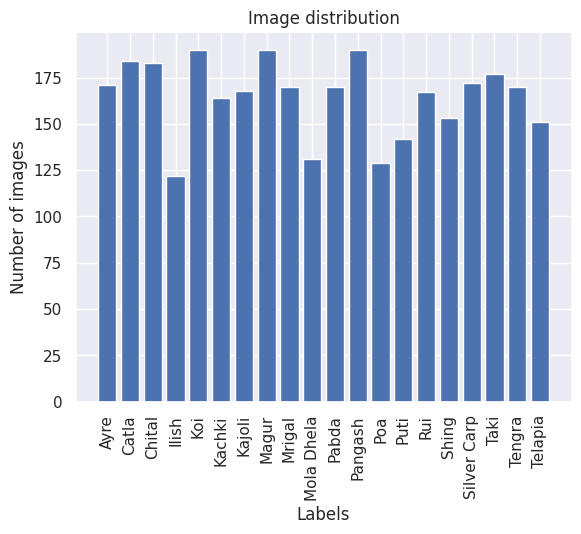

In [15]:
plot_images_distribution(data)

## **Initialization of Data Loader**

In [16]:
data_block = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_items = get_image_files,
    get_y = parent_label,
    item_tfms=Resize(224),
    batch_tfms = aug_transforms()
)

## **Initialization of Data Loader Path**

In [17]:
data_loader_path = 'DataLoaders'
folder_initialize(data_loader_path)

## **Declaration of Batch Size**

In [18]:
batch_size = 64

## **Creation of Data Loader**

In [19]:
data_loader = data_block.dataloaders(data_path, bs=batch_size)

## **Initialization of Data Loader version & Storing the dataloader**

In [20]:
version = 1
torch.save(data_loader, f"{data_loader_path}/DataLoader_v_{version}")